# BioML: Model Training Experiment - Trees

Computational Identification of Protein Phosphorylation Sites

In [13]:
import sys
import os

# To import lib from grandparent directory
current_dir = os.getcwd()
grandparent_dir = os.path.abspath( os.path.join(current_dir, "../../") )
sys.path.append(grandparent_dir)

In [14]:
from lib import encoder, evaluate
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split

### Hyperparameters

In [15]:
train_test_split_test_size = 0.2

### Loading data

In [16]:
# Seqs = encoder.Encoder("../../dataset/31mer/test/positive_cd_hit50.test.fasta",
#                        "../../dataset/31mer/test/negative_cd_hit50.test.fasta",
#                        balance=True, upsample=True)
Seqs = encoder.Encoder("../../dataset/31mer/provided_by_TA/positive_clustered_sequences.fasta",
                       "../../dataset/31mer/provided_by_TA/negative_clustered_sequences.fasta",
                       balance=True, upsample=True)

### Encoding

In [17]:
posOneHot, negOneHot = Seqs.ToOneHot()

X_data, y_data = encoder.GetLebel(posOneHot, negOneHot)
X_data = np.array(X_data)
y_data = np.array(y_data)
print(X_data.shape, y_data.shape)

(65325, 31, 20) (65325,)


### Train-test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=train_test_split_test_size, random_state=87)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(52260, 31, 20) (52260,) (13065, 31, 20) (13065,)
(52260, 620) (52260,) (13065, 620) (13065,)


### Dicision tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)

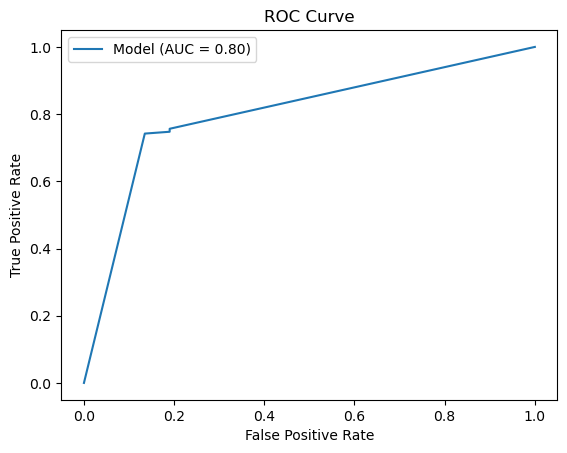

Best threshold: 1.0
Accuracy: 0.6042097206276311
Classification report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75      7894
           1       0.00      0.00      0.00      5171

    accuracy                           0.60     13065
   macro avg       0.30      0.50      0.38     13065
weighted avg       0.37      0.60      0.46     13065

Confusion matrix:
[[7894    0]
 [5171    0]]


In [28]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 0]
evaluate.Evaluation(y_test, y_proba)

### XGBoost

In [19]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=5, gamma=0).fit(X_train, y_train)

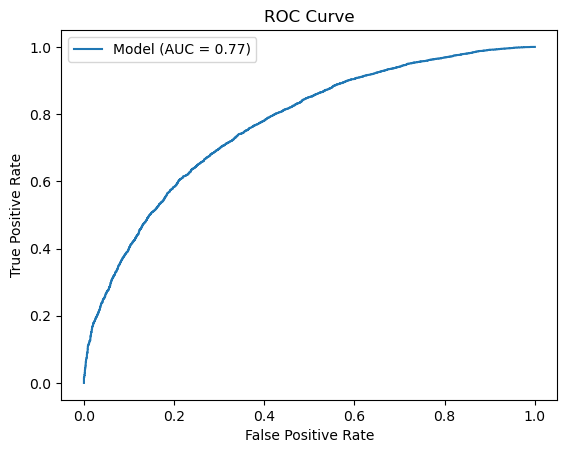

Best threshold: 0.6312495470046997
Accuracy: 0.30026789131266746
Classification report:
              precision    recall  f1-score   support

           0       0.40      0.30      0.34      7894
           1       0.22      0.30      0.26      5171

    accuracy                           0.30     13065
   macro avg       0.31      0.30      0.30     13065
weighted avg       0.33      0.30      0.31     13065

Confusion matrix:
[[2357 5537]
 [3605 1566]]


In [20]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 0]
evaluate.Evaluation(y_test, y_proba)

### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5).fit(X_train, y_train)

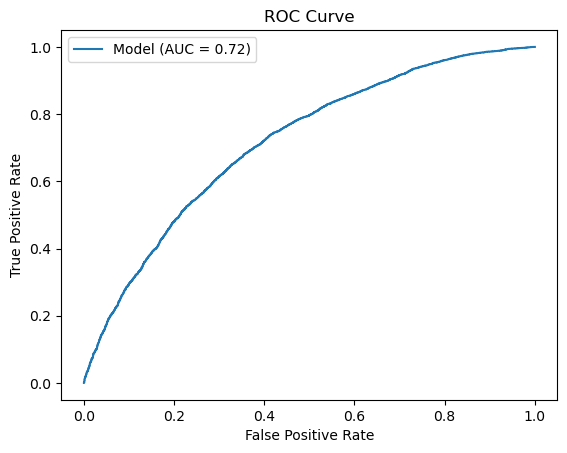

Best threshold: 0.6159852842003638
Accuracy: 0.3337160352085725
Classification report:
              precision    recall  f1-score   support

           0       0.43      0.32      0.37      7894
           1       0.25      0.36      0.30      5171

    accuracy                           0.33     13065
   macro avg       0.34      0.34      0.33     13065
weighted avg       0.36      0.33      0.34     13065

Confusion matrix:
[[2523 5371]
 [3334 1837]]


In [22]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 0]
evaluate.Evaluation(y_test, y_proba)